In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import ipywidgets.widgets as widgets
import mylib as lib
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
def cir_model(n_years=10, scenarios = 1000, a = 0.05, b = 0.03, sigma = 0.05, steps_per_year=12, initial_r = None):
    if initial_r is None: initial_r = b
    initial_r = ann_to_inst(initial_r)
    dt = 1 /steps_per_year

    num_steps = n_years * steps_per_year
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(n_years * steps_per_year, scenarios))
    rates = np.empty_like(shock)
    rates[0] = initial_r

    for step in range(1, num_steps):
        change = a*(b - rates[step-1])*dt + sigma*np.sqrt(rates[step-1])*shock[step]
        rates[step] = np.abs(rates[step-1] + change)

    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))

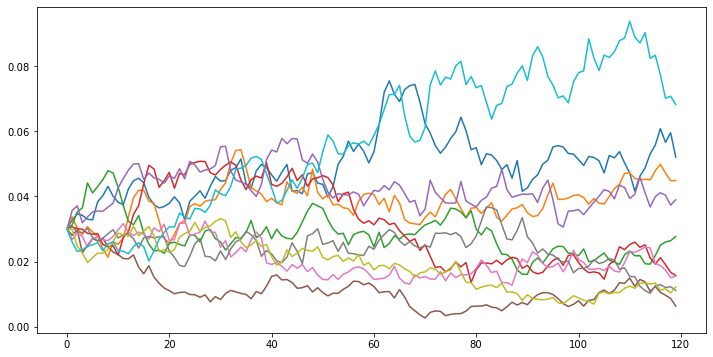

In [4]:
cir_model(scenarios=10).plot(legend=False, figsize=(12,6))

In [5]:
def plot_cir(n_years=10, scenarios = 1000, a = 0.05, b = 0.03, sigma = 0.05, steps_per_year=12, initial_r = 0.01):
    cir = cir_model(n_years, scenarios, a, b, sigma, steps_per_year, initial_r)
    ax = cir.plot(legend = False, figsize=(12,6), color="darkblue", alpha=0.2)
    ax.axhline(y=initial_r, ls=':', color="black")

In [6]:
show_cir = widgets.interactive(plot_cir, n_years=widgets.IntSlider(min=0, max=10,value=2,step=1), 
    scenarios= widgets.IntSlider(min=1, max=1000,value=10,step=10), 
    a=(.0, 1, .1), 
    b=(.0, .2, .01), 
    sigma=(.0, .3, .01), 
    steps_per_year=widgets.IntSlider(min=1, max=12, value=12, step = 1), 
    initial_r=(.0, .2, .01))

In [ ]:
#display(show_cir)

In [26]:
def show_cir_prices(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    cir = lib.cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)
    ax = cir[0].plot(legend=False, figsize=(12,5), color="darkblue", alpha=0.2)
    ax.axhline(y=r_0, ls=":", color="black")
    cir[1].plot(ax=ax, legend=False, secondary_y=True, color="indianred", alpha=0.2)
    print(cir[0][0][0])
    print(cir[1][0][0])
    

controls = widgets.interactive(show_cir_prices,
                              r_0 = (0, .15, .01),
                              a = (0, 1, .1),
                               b = (0, .15, .01),
                               sigma= (0, .1, .01),
                               n_scenarios = (1, 100))
display(controls)

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

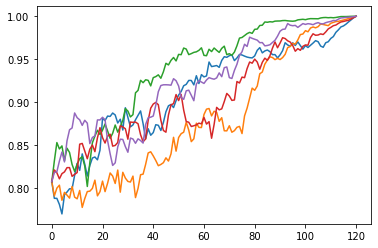

In [122]:
initial_cap = 0.5
target = 1
speed = 0.05
longterm_rate = 0.03
current_rate = 0.02
volatility = 0.05

In [ ]:
rates, bond_prices = lib.cir(n_years=10, n_scenarios=5, a=speed, b=longterm_rate, r_0=current_rate, sigma=volatility)
bond_prices.plot(legend=False)

In [115]:
liabilities = bond_prices
today_ZC_price = lib.npv(pd.Series(data=[target], index=[10]), current_rate)
number_bonds = initial_cap / today_ZC_price
#liabilities

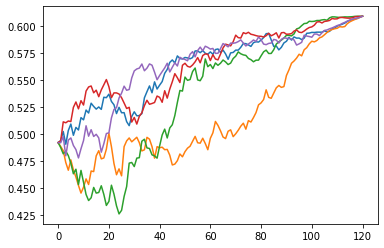

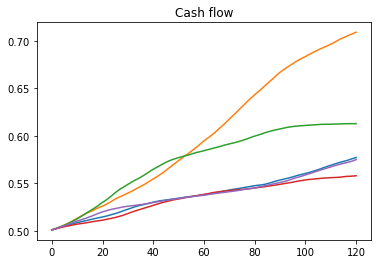

In [116]:
bonds_growth = number_bonds*bond_prices
bonds_growth.plot(legend=False)

cash_growth = initial_cap*(1+rates/12).cumprod()
cash_growth.plot(legend=False, title="Cash flow")

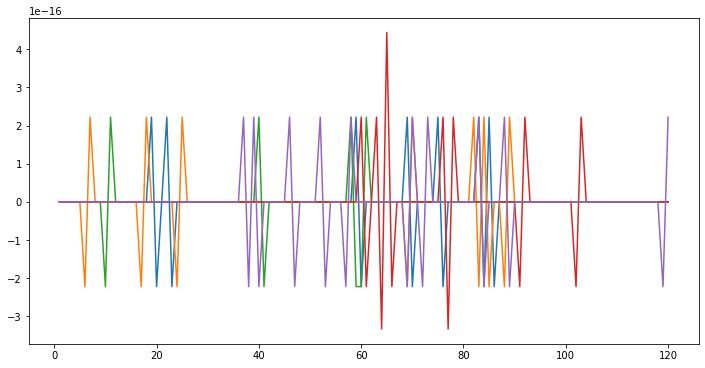

In [113]:
(bonds_growth/liabilities).pct_change().plot(legend=False, figsize=(12,6))

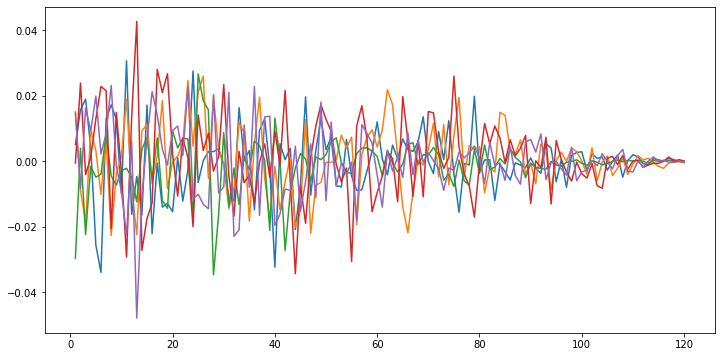

In [112]:
(cash_growth/liabilities).pct_change().plot(legend=False, figsize=(12,6))

In [174]:
#Terminal funding ratio
initial_cap = 0.2
target = 1
speed = 0.01
longterm_rate = 0.05
current_rate = 0.01
volatility = 0.05
number_of_years = 10
rates, bond_prices = lib.cir(n_years=number_of_years, n_scenarios=10000, a=speed, b=longterm_rate, r_0=current_rate, sigma=volatility)

liabilities = bond_prices
today_ZC_price = lib.npv(pd.Series(data=[target], index=[number_of_years]), current_rate)
number_bonds = initial_cap / today_ZC_price

bonds_growth = number_bonds*bond_prices
cash_growth = initial_cap*(1+rates/12).cumprod()

0.22092442508224092
0.49564211418470494


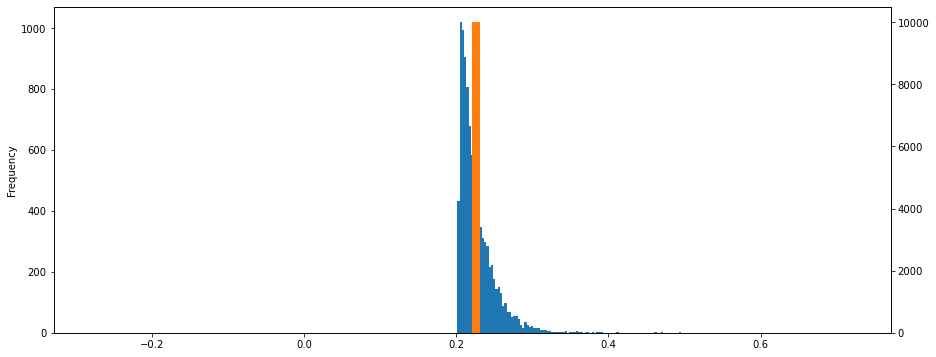

In [175]:
ax = (cash_growth.iloc[-1]/liabilities.iloc[-1]).plot.hist(figsize=(15,6), bins=100)
(bonds_growth.iloc[-1]/liabilities.iloc[-1]).plot.hist(ax=ax, bins=100, secondary_y=True)
print((bonds_growth.iloc[-1]/liabilities.iloc[-1]).iloc[-1])
print(np.max(cash_growth.iloc[-1]/liabilities.iloc[-1]))

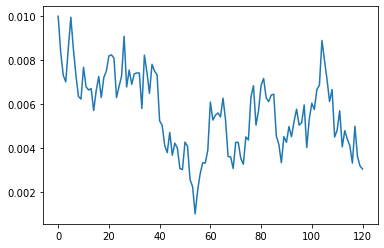

In [180]:
rates[1000].plot()